# Section 07 - Classfication
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix, r2_score, roc_curve, auc

### Classification

Classification is the task of approximating a mapping function (f) from input variables (X) to **discrete output variables (y)**. The output variables are often called `labels` or `categories`. A classification problem with two classes is often called binary classification problem. A problem with more than two classes is often called a multi-class classification problem.

For example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“;

### Classification vs Regression 

Recap: Regression is the task of approximating a mapping function (f) from input variables (X) to a **continuous output variable (y)**. A continuous output variable is a real-value, such as an integer or floating point value.

| Classification | Regression |
| --- | --- |
| discrete | countious|
| In Classification, we try to find the decision boundary, which can divide the dataset into different classes.|In Regression, we try to find the best fit line, which can predict the output more accurately. | 
| Classification predictions can be evaluated using accuracy, whereas regression predictions cannot.|Regression predictions can be evaluated using root mean squared error, whereas classification predictions cannot.

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png alt="image info" style="width: 500px;"/>



### DataSet

Due to spread of COVID-19, vaccine development is being demanded as soon as possible. The dataset we use in this notebook describes the [B-cell](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiDidjy38fzAhX5oHIEHVEOC0IQFnoECAwQAw&url=https%3A%2F%2Fwww.hindawi.com%2Fjournals%2Fjir%2F2017%2F2680160%2F&usg=AOvVaw1qjR4h3uzKaJu1p3eWWYIW) epitope predictions, which is the antigen portion binding to the immunoglobulin or antibody. 


`input_bcell.csv` : this is our main training data. It has 14387 rows and 14 columns.

Columns Interpretions:
* `parent_protein_id`: parent protein ID
* `protein_seq`: parent protein sequence
* `start_position`: start position of peptide
* `end_position`: end position of peptide
* `peptide_seq`: peptide sequence
* `chou_fasman`: peptide feature, β turn
* `emini`: peptide feature, relative surface accessibility
* `kolaskar_tongaonkar`: peptide feature, antigenicity
* `parker`: peptide feature, hydrophobicity
* `isoelectric_point`: protein feature
* `aromacity`: protein feature
* `hydrophobicity`: protein feature
* `stability`: protein feature
* `target`: antibody valence (target value)

### Q1 - KNN

***KNN*** calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. Then it selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.
<img src= https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-2.png alt="image info" style="width: 300px;"/>

For instance, we want to classify a new point 'X' belongs to Blue class or Red class. We can use KNN with number of neighbors equal to `3`, where it means finds the `3 nearest points` with least distance to point X. KNN first calcualtes the distance btween X and all other points, then pick 3 nearest points (circled above). Since there are two Red points and one Blue point inside the circle, then we choose Red to be the class of X.

**Read the dataset, create a correlation matrix, split the data with 30% testing, and apply KNN to do classification with number of neighbors equal to 3. What is the prediction accuracy?**

In [2]:
# read table
df = pd.read_csv("input_bcell.csv")
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [3]:
# general shape
print("dataset shape is: ", df.shape)
print("number of row is: ", df.shape[0])
print("number of col is: ", df.shape[1])

dataset shape is:  (14387, 14)
number of row is:  14387
number of col is:  14


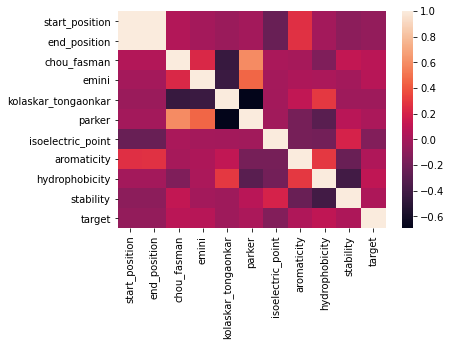

In [4]:
# correlation matrix
# automatically generated without four string type columns
sns.heatmap(df.corr())
plt.show()

In [5]:
# prepare training and testing set
# We drop the 3 columns which contain string values and the target column
X = df.drop(['target', 'parent_protein_id', 'protein_seq', 'peptide_seq'], axis = 1)
y = df['target']
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
knn_preds_n3 = knn_model.predict(X_test)
print('The accuracy for KNN(n=3) model prediction is: ', accuracy_score(y_test,knn_preds_n3))

The accuracy for KNN(n=3) model prediction is:  0.744266851980542


**Try to use different number of neighbors, such as [1,3,4,6,10,30,50], in KNN classifier and plot the prediction accuracy. What can you observe? How to choose number of neighbors in KNN?**

In [8]:
# see different number of neighbors
neighbors = [1,3,4,6,10,30,50]
knn_score_lst = []
for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test,preds)
    mse = mean_squared_error(y_test,preds)
    knn_score_lst.append(accuracy)

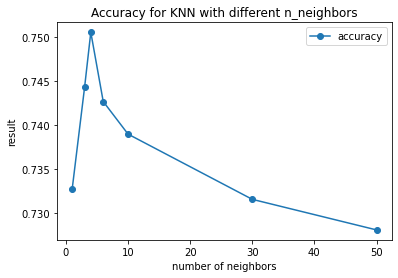

In [9]:
# generate a plot with above result
plt.plot(neighbors, knn_score_lst, "-o", label = "accuracy")
plt.xlabel('number of neighbors')
# Set the y axis label of the current axis.
plt.ylabel('result')
# Set a title of the current axes.
plt.title('Accuracy for KNN with different n_neighbors')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

As number of neighbors increase, the prediction accuray shows a descreasing trend. So, larger K does not mean better predcition result.

There are no pre-defined statistical methods to find the most favorable value of K, but we can initialize a random K value and start computing. A small value of K might cause unstable decision boundaries (noise); a large value of K will be computationally expensive and somehow conflict with the basic logic behind KNN (including all data points in the circle).

### Q2 - LDA

***LDA*** is a `dimensionality reduction` technique. It reduces the number of dimensions (i.e. variables or dimensions or features) in a dataset while retaining as much information as possible. LDA works by calculating summary statistics for the input features by class label, such as the mean and standard deviation. It uses those information to create a new axis and `projects the data` on to the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.

***Comparing LDA and PCA:***
<img src=https://nirpyresearch.com/wp-content/uploads/2018/11/PCAvsLDA-1024x467.png alt="image info" style="width: 500px;"/>

**Apply LDA to do classification. What is the prediction accuracy?**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
# create LDA model
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
# predict target
LDA_preds = LDA_model.predict(X_test)
# check results
print('The accuracy for LDA model prediction is: ', accuracy_score(y_test,LDA_preds))

The accuracy for LDA model prediction is:  0.7271253185082233


### Q3 - Naive Bayes

***Naive Bayes*** is a classification algorithm that works based on the Bayes theorem. If we are trying to decide between two labels using Naive Bayes classifier, then we can compute the ratio of the posterior probabilities for each label. Then assign the new point to most probable class. It assumes `independence` among predictors.

***General Steps:***
* Step 1: Calculate the prior probability for each class
* Step 2: Find Likelihood probability with each attribute for each class
* Step 3: Calculate posterior probability using Bayes Theorem
* Step 4: Make prediction, choose the class with highest probability

**Can you manually compute predictions and prediction accuracy by using Gaussian Naive Bayes method?**
* Step1, calculate mean and std for two classes (target = 0 and target = 1)
* Step2, compute likelyhood by using gaussian function
* Step3, compute posterior
* Step4, compare posterior probabilities

In [12]:
mean_0=np.mean(X_train[y_train == 0], axis=0)
mean_1=np.mean(X_train[y_train == 1], axis=0)
std_0=np.std(X_train[y_train == 0], axis=0)
std_1=np.std(X_train[y_train == 1], axis=0)

In [13]:
def likelihood(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))

In [14]:
def posterior(X,X_train_class,mean_,std_):
    product=np.prod(likelihood(X,mean_,std_),axis=1)
    product=product*(X_train_class.shape[0]/X_train.shape[0])
    return product

In [15]:
p_1=posterior(X_test,X_train[y_train == 1],mean_1,std_1)
p_0=posterior(X_test,X_train[y_train == 0],mean_0,std_0)
y_pred=1*(p_1>p_0)

In [16]:
manul_accuracy = sum(y_pred == y_test)/len(y_pred)
print("manually computed prediction accuracy is: ", manul_accuracy)

manually computed prediction accuracy is:  0.7197127634931666


**Apply Gaussian Naive Bayes to do classification. What is the prediction accuracy? Why it's higher/lower compare to pervious two models?**

In [17]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Predicting the Test set results
NB_pred = NB_model.predict(X_test)

print('The accuracy for Naive Bayes model prediction is: ', accuracy_score(y_test,NB_pred))

The accuracy for Naive Bayes model prediction is:  0.7217975445911513


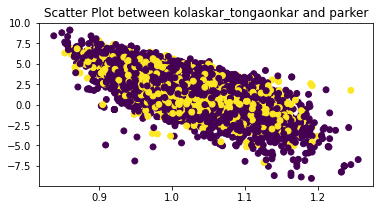

In [18]:
# some features in data are not independent
# for instance, if we plot 'kolaskar_tongaonkar' and 'parker'
# they show a linear relationship

plt.figure(figsize=(6, 3)) 
plt.scatter(df['kolaskar_tongaonkar'], df['parker'], c = df['target'], marker = 'o', s = 35)
plt.title("Scatter Plot between kolaskar_tongaonkar and parker")
plt.show()

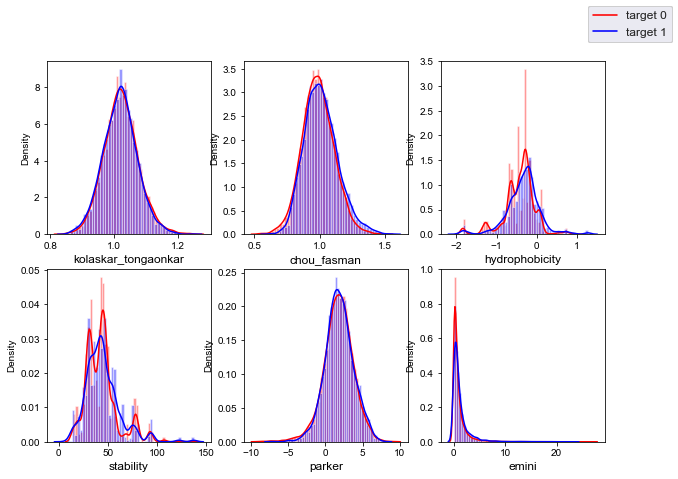

In [19]:
# some of features have normal distribution
# some of them do not have normal distribution
# such as hydrophobicity, stability, emini

import warnings
warnings.filterwarnings("ignore")

idx_train = df['target'].astype("bool").values
fig, axes = plt.subplots(2, 3,figsize=(10,7))
sns.set_style('darkgrid')
axes = [x for a in axes for x in a]
for i,name in enumerate(["kolaskar_tongaonkar", "chou_fasman", "hydrophobicity", "stability", "parker", "emini"]):
    value = df[name]
    sns.distplot(value[~idx_train],ax = axes[i], color='red')
    sns.distplot(value[idx_train],ax = axes[i], color = 'blue')
    axes[i].set_xlabel(name,fontsize=12)
    fig.legend(labels = ["target 0","target 1"],loc="upper right",fontsize=12)

Gaussian Naive Bayes has lower accuracy comaring to pervious models. One reason will be that some features are not independent. Since we use Gaussian Naive Bayes as our model here; then we assume that all the features are following normal distribution. Another reason will be that in our dataset some of features do not have normal distribution.

### Q4 - Combine Normalization and PCA with Classification problem

Combine methods we learnt before with this classfication problem. First apply normalization to KNN and LDA models. Then apply both normalization and PCA to those two models. Do Normalization or PCA help increase the accuracy score? Why

In [20]:
# Normalize data 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(X_train_scaled, y_train)
knn_preds_n3_scaled = knn_model_scaled.predict(X_test_scaled)
print('The accuracy for KNN model prediction is: ', accuracy_score(y_test,knn_preds_n3_scaled))

# create LDA model
LDA_model_scaled = LinearDiscriminantAnalysis()
LDA_model_scaled.fit(X_train_scaled, y_train)
# predict target
LDA_preds_scaled = LDA_model_scaled.predict(X_test_scaled)
# check results
print('The accuracy for LDA model prediction is: ', accuracy_score(y_test,LDA_preds_scaled))

The accuracy for KNN model prediction is:  0.7729905026638869
The accuracy for LDA model prediction is:  0.7271253185082233


In [21]:
# Normalize data and apply PCA
pca = PCA(n_components=5) 
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(pca_train, y_train)
knn_preds_n3_scaled = knn_model_scaled.predict(pca_test)
print('The accuracy for KNN model prediction is: ', accuracy_score(y_test,knn_preds_n3_scaled))

# create LDA model
LDA_model_scaled = LinearDiscriminantAnalysis()
LDA_model_scaled.fit(pca_train, y_train)
# predict target
LDA_preds_scaled = LDA_model_scaled.predict(pca_test)
# check results
print('The accuracy for LDA model prediction is: ', accuracy_score(y_test,LDA_preds_scaled))

The accuracy for KNN model prediction is:  0.744266851980542
The accuracy for LDA model prediction is:  0.7245772527217975


Normalization acturally helps increase the classfication accuracy, but when we apply both normalization and PCA, the accuracy for KNN and LDA decreases; the accuracy for Naive Bayes increases. It means when we use all features, KNN and LDA have better performance.

**Reference**

document:

https://www.javatpoint.com/regression-vs-classification-in-machine-learning

https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

https://medium.com/machine-learning-algorithms-from-scratch/naive-bayes-classification-from-scratch-in-python-e3a48bf5f91a

data: 

https://future-architect.github.io/articles/20200801/

https://www.kaggle.com/futurecorporation/epitope-prediction?select=input_bcell.csv
